<h2 align="center">Завдання №2: Реалізація типу "граф"</h2>

### Мета роботи
    Опанувати способи представлення різних типів графів (неорієнтовані, орієнтовані, зважені) та їх ефективної реалізації

### Основне завдання

1. Реалізувати абстрактний клас "граф". В якості базового представлення обрати один з двох способів представлення: матрицею суміжності або списками суміжності. Основний конструктор повинен приймати на вхід кількість вершин *n* у графі та створювати порожній граф (без ребер) із множиною вершин *V = {1, 2, ..., n}*
2. Реалізувати класи-нащадки "неорієнтований граф", "орієнтований граф", "зважений граф" (орієнтований та/або неорієнтований). Ієрархія класів залишається на ваш розсуд.
3. Реалізувати базові операції перетворення графів:

    * додавання нової вершини;
    * додавання нового ребра;
    * видалення існуючої вершини;
    * видалення існуючого ребра.
4. Реалізувати внутрішній конвертор між представленням у формі матриці суміжності та представленням у формі списків суміжності.
*Заувження:* не рекомендується підтримувати одночасно обидва представлення, оскільки це знижує ефективність роботи із графами; однак у вас повинна бути можливість за потреби переключитись з одного представлення у інше для виконання якогось алгоритму, а потім повернутись назад.
5. Реалзувати генерування випадковго графу у моделі Ердаша-Реньї, у вигляді спеціалізованого конструктора або внутрішньої процедури. Така процедура повинна приймати на вхід кількість вершин графу *n* та ймовірність *p* появи довільного ребра. Для зважених графів також необхідно вказати межі, які може приймати вага ребра.
6. *Бонусне завдання (+1 бал):* реалізувати візуалізацію графу для користувача.

### Виконання завдання:

У файлі `MatrixGraph.py` реалізовані необхідні класи для завдання.

Перевіряюємо вивід графу та деякі операції

In [58]:
from MatrixGraph import *

test = OrientedMatrixGraph(3)
test.add_edge(1, 2)
print(test)
test.add_edge(2, 2)
print(test)
test.del_edge(2, 2)
print(test)
ltest = test.matrix2list()

[[None, None, None]
 [None, None, 1]
 [None, None, None]]

[[None, None, None]
 [None, None, 1]
 [None, None, 1]]

[[None, None, None]
 [None, None, 1]
 [None, None, None]]



Переведення з матриці в список суміжності

In [59]:
print(ltest)
ltest.del_edge(1, 2)
print(ltest)
print(ltest.list2matrix())

0 : [] 
1 : [(2, 1)] 
2 : [] 

0 : [] 
1 : [] 
2 : [] 

[[None, None, None]
 [None, None, None]
 [None, None, None]]



малюємо граф :)

In [62]:
import matplotlib.pyplot as plt
import numpy as np

def connect_2dots(x, y):
    plt.plot([x[0], y[0]], [x[1], y[1]], color="black")

R = 5
def draw_graph(graph: OrientedWeightedMatrixGraph, R: float = 5.):
    V = graph.V
    lov = np.zeros((V, 2))
    
    alpha = 2*math.pi/V
    for i in range(V):
        lov[i, 0] = R*np.sin(alpha*i)
        lov[i, 1] = R*np.cos(alpha*i)
    plt.scatter(lov[..., 0], lov[..., 1])
    for i in range(V):
        for j in range(V):
            if graph.matrix[i][j]:
                connect_2dots(lov[i], lov[j])

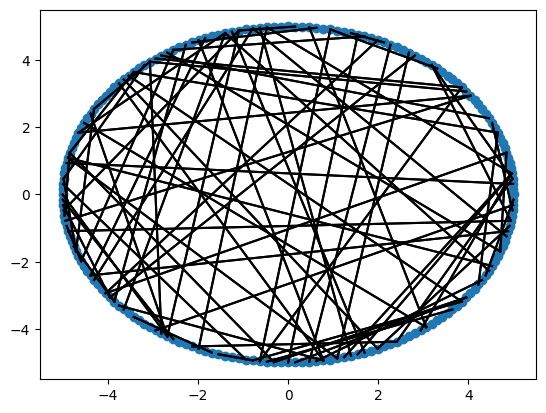

In [63]:
test = NonOrientedMatrixGraph(200)
test.model_Erdasha_Renya(1/500)
draw_graph(test)

Аналіз операцій

In [64]:
def get_rand_2_number(N: int) -> list:
    l = list(range(N))
    res = []
    for _ in range(N):
        res.append([random.choice(l), random.choice(l)])
    return res


In [65]:
get_rand_2_number(100)

[[26, 10],
 [41, 69],
 [10, 70],
 [22, 58],
 [16, 97],
 [77, 13],
 [17, 73],
 [50, 79],
 [37, 5],
 [63, 48],
 [95, 99],
 [30, 20],
 [31, 6],
 [7, 48],
 [33, 24],
 [48, 47],
 [6, 86],
 [99, 8],
 [33, 77],
 [1, 10],
 [63, 72],
 [9, 72],
 [44, 74],
 [98, 63],
 [87, 3],
 [30, 68],
 [23, 91],
 [83, 40],
 [82, 82],
 [92, 19],
 [28, 92],
 [32, 91],
 [65, 42],
 [77, 9],
 [75, 2],
 [20, 50],
 [74, 54],
 [67, 49],
 [83, 79],
 [6, 58],
 [69, 9],
 [69, 38],
 [81, 70],
 [95, 98],
 [47, 65],
 [37, 35],
 [98, 61],
 [26, 4],
 [64, 57],
 [41, 81],
 [93, 56],
 [62, 91],
 [76, 77],
 [55, 14],
 [42, 98],
 [75, 97],
 [9, 8],
 [54, 87],
 [16, 2],
 [10, 16],
 [88, 93],
 [58, 10],
 [92, 28],
 [29, 58],
 [18, 76],
 [50, 35],
 [67, 64],
 [35, 88],
 [9, 51],
 [47, 88],
 [40, 21],
 [13, 79],
 [58, 45],
 [8, 2],
 [81, 7],
 [72, 56],
 [99, 92],
 [31, 83],
 [0, 21],
 [55, 4],
 [41, 75],
 [11, 90],
 [89, 48],
 [32, 65],
 [24, 77],
 [4, 18],
 [92, 36],
 [51, 74],
 [25, 61],
 [51, 43],
 [12, 35],
 [41, 63],
 [2, 27],
 

In [66]:
X = list(range(1, 1001, 10))

In [67]:
import time

def init_time(N: int):
    start_time_init = time.time()
    for _ in range(N):
        a = OrientedWeightedMatrixGraph(N)
    return (time.time() - start_time_init) / N

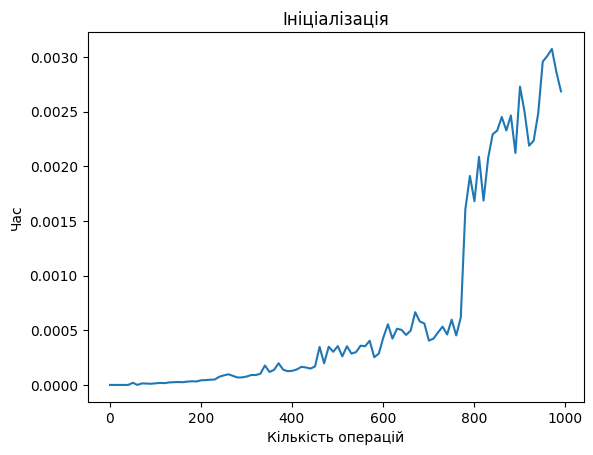

In [68]:
Y_it = []
for i in X:
    Y_it.append(init_time(i))

plt.title("Ініціалізація")
plt.xlabel("Кількість операцій")
plt.ylabel("Час")
plt.plot(X, Y_it)

In [69]:
def add_vert_time(N: int):
    graph = OrientedMatrixGraph(1)
    start_time = time.time()
    for i in range(N):
        graph.add_vert()
    return (time.time() - start_time) / N

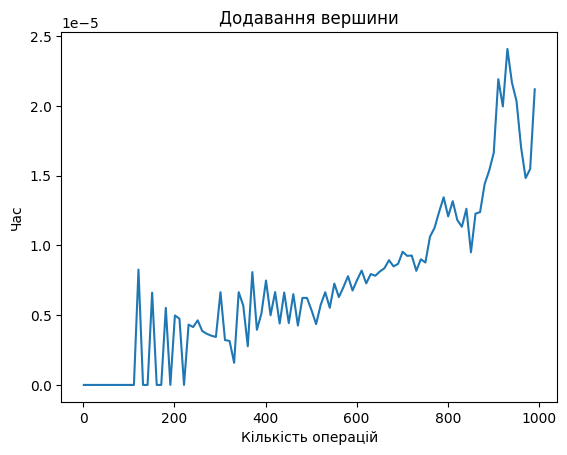

In [70]:
Y_avt = []
for i in X:
    Y_avt.append(add_vert_time(i))
    
plt.title("Додавання вершини")
plt.xlabel("Кількість операцій")
plt.ylabel("Час")
plt.plot(X, Y_avt)

In [71]:
def del_vert_time(N: int):
    graph = OrientedMatrixGraph(N+1)
    start_time = time.time()
    for i in range(N):
        graph.del_vert(graph.V-1)
    return (time.time() - start_time) / N

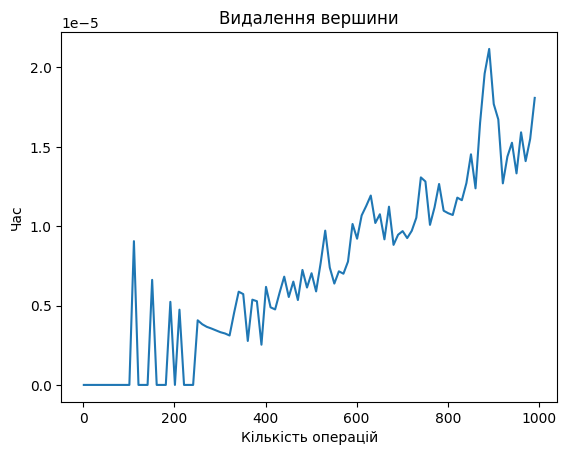

In [72]:
Y_dvt = []
for i in X:
    Y_dvt.append(del_vert_time(i))

plt.title("Видалення вершини")
plt.xlabel("Кількість операцій")
plt.ylabel("Час")
plt.plot(X, Y_dvt)

In [73]:
graph_add_edge = OrientedMatrixGraph(1000)
def add_edge_time(N: int, size: int = 1000):
    number_list = get_rand_2_number(size)
    start_time_add_edge = time.time()
    for a in number_list:
        graph_add_edge.add_edge(a[0], a[1])
    return (time.time() - start_time_add_edge) / N

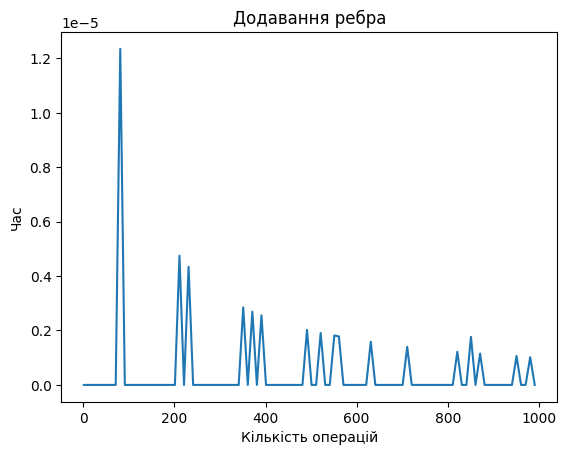

In [74]:
Y_aet = []
for i in X:
    Y_aet.append(add_edge_time(i))

plt.title("Додавання ребра")
plt.xlabel("Кількість операцій")
plt.ylabel("Час")
plt.plot(X, Y_aet)

In [75]:
graph_del_edge = OrientedMatrixGraph(1000)
graph_del_edge.model_Erdasha_Renya(1)
def del_edge_time(N: int, size: int = 1000):
    number_list = get_rand_2_number(size)
    start_time_add_edge = time.time()
    for a in number_list:
        graph_del_edge.del_edge(a[0], a[1])
    return (time.time() - start_time_add_edge) / N

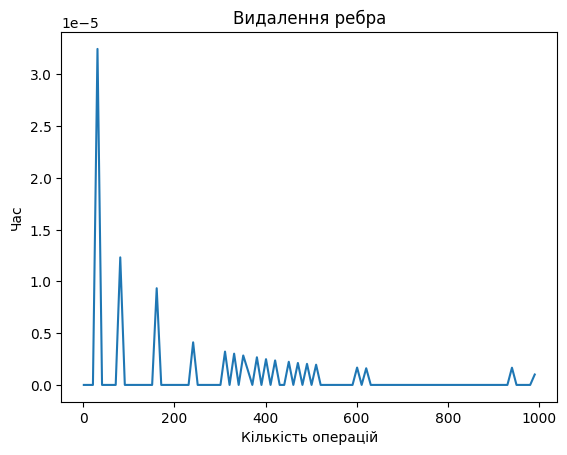

In [76]:
Y_det = []
for i in X:
    Y_det.append(del_edge_time(i))

plt.title("Видалення ребра")
plt.xlabel("Кількість операцій")
plt.ylabel("Час")
plt.plot(X, Y_det)